![](GMIT_Logo.jpg)

# Higher Diploma in Science in Computing (Data Analytics)
#### Programme Module: Programming for Data Analysis (COMP08050)
---
### Project 2020

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv(
    'https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv')

In [46]:
df

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116


In [47]:
df.rename(columns={"Airport.Code": "Airport Code", "Airport.Name": "Airport Name", "Time.Label": "Time Label",
                   "Time.Month": "Time Month", "Time.Month Name": "Time Month Name", "Time.Year": "Time Year",
                   "Statistics.# of Delays.Carrier": "Number of Delays Carrier", "Statistics.# of Delays.Late Aircraft": "Number of Delays Late Aircraft",
                   "Statistics.# of Delays.National Aviation System": "Number of Delays National Aviation System",
                   "Statistics.# of Delays.Security": "Number of Delays Security", "Statistics.# of Delays.Weather": "Number of Delays Weather",
                   "Statistics.Carriers.Names": "Carriers Names", "Statistics.Carriers.Total": "Carriers Total", "Statistics.Flights.Cancelled": "Flights Cancelled",
                   "Statistics.Flights.Delayed": "Flights Delayed", "Statistics.Flights.Diverted": "Flights Diverted", "Statistics.Flights.On Time": "Flights On Time",
                   "Statistics.Flights.Total": "Flights Total", "Statistics.Minutes Delayed.Carrier": "Minutes Delayed Carrier",
                   "Statistics.Minutes Delayed.Late Aircraft": "Minutes Delayed Late Aircraft",
                   "Statistics.Minutes Delayed.National Aviation System": "Minutes Delayed National Aviation System",
                   "Statistics.Minutes Delayed.Security": "Minutes Delayed Security", "Statistics.Minutes Delayed.Total": "Minutes Delayed Total",
                   "Statistics.Minutes Delayed.Weather": "Minutes Delayed Weather"}, inplace=True)

In [48]:
df.shape

(4408, 24)

In [49]:
print(df.isnull().sum())

Airport Code                                 0
Airport Name                                 0
Time Label                                   0
Time Month                                   0
Time Month Name                              0
Time Year                                    0
Number of Delays Carrier                     0
Number of Delays Late Aircraft               0
Number of Delays National Aviation System    0
Number of Delays Security                    0
Number of Delays Weather                     0
Carriers Names                               0
Carriers Total                               0
Flights Cancelled                            0
Flights Delayed                              0
Flights Diverted                             0
Flights On Time                              0
Flights Total                                0
Minutes Delayed Carrier                      0
Minutes Delayed Late Aircraft                0
Minutes Delayed National Aviation System     0
Minutes Delay

In [50]:
df.dtypes

Airport Code                                 object
Airport Name                                 object
Time Label                                   object
Time Month                                    int64
Time Month Name                              object
Time Year                                     int64
Number of Delays Carrier                      int64
Number of Delays Late Aircraft                int64
Number of Delays National Aviation System     int64
Number of Delays Security                     int64
Number of Delays Weather                      int64
Carriers Names                               object
Carriers Total                                int64
Flights Cancelled                             int64
Flights Delayed                               int64
Flights Diverted                              int64
Flights On Time                               int64
Flights Total                                 int64
Minutes Delayed Carrier                       int64
Minutes Dela

In [51]:
df.describe()

,Time Month,Time Year,Number of Delays Carrier,Number of Delays Late Aircraft,Number of Delays National Aviation System,Number of Delays Security,Number of Delays Weather,Carriers Total,Flights Cancelled,Flights Delayed,Flights Diverted,Flights On Time,Flights Total,Minutes Delayed Carrier,Minutes Delayed Late Aircraft,Minutes Delayed National Aviation System,Minutes Delayed Security,Minutes Delayed Total,Minutes Delayed Weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


In [52]:
df.dtypes

Airport Code                                 object
Airport Name                                 object
Time Label                                   object
Time Month                                    int64
Time Month Name                              object
Time Year                                     int64
Number of Delays Carrier                      int64
Number of Delays Late Aircraft                int64
Number of Delays National Aviation System     int64
Number of Delays Security                     int64
Number of Delays Weather                      int64
Carriers Names                               object
Carriers Total                                int64
Flights Cancelled                             int64
Flights Delayed                               int64
Flights Diverted                              int64
Flights On Time                               int64
Flights Total                                 int64
Minutes Delayed Carrier                       int64
Minutes Dela

In [53]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Airport Code                               4408 non-null   object
 1   Airport Name                               4408 non-null   object
 2   Time Label                                 4408 non-null   object
 3   Time Month                                 4408 non-null   int64 
 4   Time Month Name                            4408 non-null   object
 5   Time Year                                  4408 non-null   int64 
 6   Number of Delays Carrier                   4408 non-null   int64 
 7   Number of Delays Late Aircraft             4408 non-null   int64 
 8   Number of Delays National Aviation System  4408 non-null   int64 
 9   Number of Delays Security                  4408 non-null   int64 
 10  Number of Delays Weather            

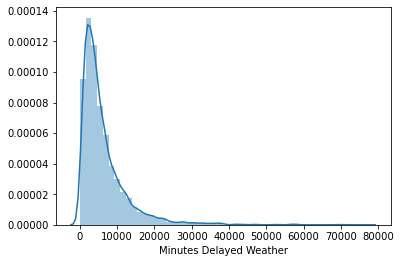

In [54]:
a= 'Minutes Delayed Weather'
sns.distplot(df[a])

In [55]:
df = df.copy()

In [56]:
# new data frame with split value columns 
new = df["Airport Name"].str.split(",", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["City"]= new[0] 
  
# making separate last name column from new data frame 
df["State"]= new[1] 
  
# Dropping old Name columns 
#df.drop(columns =["Name"], inplace = True) 
  
# df display 
df

,Airport Code,Airport Name,Time Label,Time Month,Time Month Name,Time Year,Number of Delays Carrier,Number of Delays Late Aircraft,Number of Delays National Aviation System,Number of Delays Security,...,Flights On Time,Flights Total,Minutes Delayed Carrier,Minutes Delayed Late Aircraft,Minutes Delayed National Aviation System,Minutes Delayed Security,Minutes Delayed Total,Minutes Delayed Weather,City,State
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,23974,30060,61606,68335,118831,518,268764,19474,Atlanta,GA: Hartsfield-Jackson Atlanta International
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,7875,9639,20319,28189,24400,99,77167,4160,Boston,MA: Logan International
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,6998,8287,13635,26810,17556,278,64480,6201,Baltimore,MD: Baltimore/Washington International Thurgo...
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,7021,8670,14763,23379,23804,127,65865,3792,Charlotte,NC: Charlotte Douglas International
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,5321,6513,13775,13712,20999,120,52747,4141,Washington,DC: Ronald Reagan Washington National
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,5030,6016,15482,23023,6021,79,46206,1601,San Diego,CA: San Diego International
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,8330,9739,25461,32693,11466,73,74017,4324,Seattle,WA: Seattle/Tacoma International
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,8912,13206,43641,72557,153416,66,278610,8930,San Francisco,CA: San Francisco International
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,7426,8699,32066,33682,8057,57,76978,3116,Salt Lake City,UT: Salt Lake City International


In [57]:
# new data frame with split value columns 
new = df["State"].str.split(":", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["State"]= new[0] 
  
# making separate last name column from new data frame 
df["Airport"]= new[1] 
  
# Dropping old Name columns 
#df.drop(columns =["Name"], inplace = True) 
  
# df display 
df

,Airport Code,Airport Name,Time Label,Time Month,Time Month Name,Time Year,Number of Delays Carrier,Number of Delays Late Aircraft,Number of Delays National Aviation System,Number of Delays Security,...,Flights Total,Minutes Delayed Carrier,Minutes Delayed Late Aircraft,Minutes Delayed National Aviation System,Minutes Delayed Security,Minutes Delayed Total,Minutes Delayed Weather,City,State,Airport
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,30060,61606,68335,118831,518,268764,19474,Atlanta,GA,Hartsfield-Jackson Atlanta International
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,9639,20319,28189,24400,99,77167,4160,Boston,MA,Logan International
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,8287,13635,26810,17556,278,64480,6201,Baltimore,MD,Baltimore/Washington International Thurgood M...
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,8670,14763,23379,23804,127,65865,3792,Charlotte,NC,Charlotte Douglas International
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,6513,13775,13712,20999,120,52747,4141,Washington,DC,Ronald Reagan Washington National
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,6016,15482,23023,6021,79,46206,1601,San Diego,CA,San Diego International
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,9739,25461,32693,11466,73,74017,4324,Seattle,WA,Seattle/Tacoma International
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,13206,43641,72557,153416,66,278610,8930,San Francisco,CA,San Francisco International
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,8699,32066,33682,8057,57,76978,3116,Salt Lake City,UT,Salt Lake City International


In [58]:
# df display 
df=df[["Airport Code", "Airport Name", "City", "State", "Airport", "Time Label", "Time Month", "Time Month Name", "Time Year", "Number of Delays Carrier", "Number of Delays Late Aircraft", "Number of Delays National Aviation System", "Number of Delays Security", "Number of Delays Weather", "Carriers Names", "Carriers Total", "Flights Cancelled", "Flights Delayed", "Flights Diverted", "Flights On Time", "Flights Total", "Minutes Delayed Carrier", "Minutes Delayed Late Aircraft", "Minutes Delayed National Aviation System", "Minutes Delayed Security", "Minutes Delayed Total", "Minutes Delayed Weather"
]]

### References

In [59]:
df

,Airport Code,Airport Name,City,State,Airport,Time Label,Time Month,Time Month Name,Time Year,Number of Delays Carrier,...,Flights Delayed,Flights Diverted,Flights On Time,Flights Total,Minutes Delayed Carrier,Minutes Delayed Late Aircraft,Minutes Delayed National Aviation System,Minutes Delayed Security,Minutes Delayed Total,Minutes Delayed Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",Atlanta,GA,Hartsfield-Jackson Atlanta International,2003/06,6,June,2003,1009,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",Boston,MA,Logan International,2003/06,6,June,2003,374,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",Baltimore,MD,Baltimore/Washington International Thurgood M...,2003/06,6,June,2003,296,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",Charlotte,NC,Charlotte Douglas International,2003/06,6,June,2003,300,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",Washington,DC,Ronald Reagan Washington National,2003/06,6,June,2003,283,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",San Diego,CA,San Diego International,2016/01,1,January,2016,280,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",Seattle,WA,Seattle/Tacoma International,2016/01,1,January,2016,357,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",San Francisco,CA,San Francisco International,2016/01,1,January,2016,560,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",Salt Lake City,UT,Salt Lake City International,2016/01,1,January,2016,338,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116


[1] Romani, E., 2020. *How To Generate Pseudo-Random Datasets In Python: Start From Scratch With Numpy & Faker*. [online] Medium. Available at: <https://towardsdatascience.com/how-to-generate-pseudo-random-datasets-in-python-start-from-scratch-with-numpy-faker-c5661e3bc58b> [Accessed 25 November 2020].

[2] The Alan Turing Institute. 2020. *Interpreting Large Datasets Using Simulation*. [online] Available at: <https://www.turing.ac.uk/research/research-projects/interpreting-large-datasets-using-simulation> [Accessed 25 November 2020].

[3] Zief0002.github.io. 2020. *Monte Carlo Simulation | Statistical Thinking: A Simulation Approach To Modeling Uncertainty*. [online] Available at: <https://zief0002.github.io/statistical-thinking/monte-carlo-simulation.html> [Accessed 25 November 2020].

[4] Obi Tayo, B., 2019. *Machine Learning Model For Stochastic Processes*. [online] Medium. Available at: <https://medium.com/towards-artificial-intelligence/machine-learning-model-for-stochastic-processes-c65a96f0b8c5> [Accessed 25 November 2020].

[5] Obi Tayo, B., 2019. *Building A Machine Learning Model When Data isn’t Available*. [online] Medium. Available at: <https://medium.com/towards-artificial-intelligence/building-a-machine-learning-model-when-data-isnt-available-fce8d20f0fd0> [Accessed 24 November 2020].

[6] appliedAI. 2020. *Synthetic Data Generation: Techniques, Best Practices & Tools*. [online] Available at: <https://research.aimultiple.com/synthetic-data-generation/> [Accessed 25 November 2020].

[7] GitHub. 2018. *Theodi/Synthetic-Data-Tutorial*. [online] Available at: <https://github.com/theodi/synthetic-data-tutorial> [Accessed 24 November 2020].